# Computations for vorticity, potential density, buoyancy and geostrophic currents

In [1]:
import xarray as xr
from xgcm import Grid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib qt

In [2]:
ppdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/';
dsgrid = xr.open_dataset(f'{ppdir}/ocean_monthly_z/ocean_monthly_z.static.nc')

In [3]:
ds = xr.open_mfdataset(f'{ppdir}/ocean_monthly_z/ts/monthly/1yr/*.nc', combine='by_coords')

In [71]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center

In [7]:
vorticity = ( - grid.diff(ds.uo * dsgrid.dxCu, 'Y', boundary='fill')
              + grid.diff(ds.vo * dsgrid.dyCv, 'X', boundary='fill') ) / dsgrid.areacello_bu;

In [5]:
def pdens(S,theta):
    
    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464
    
    # To compute potential density keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals
    
    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S 
    
    pot_dens = (p + p0)/(lambd + alpha0*(p + p0))
    
    return pot_dens    

In [6]:
pot_density = pdens(ds.so, ds.thetao)

In [8]:
print(vorticity)
print(pot_density)

<xarray.DataArray (time: 12, z_l: 35, yq: 1080, xq: 1440)>
dask.array<truediv, shape=(12, 35, 1080, 1440), dtype=float32, chunksize=(12, 35, 1079, 1439), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xq       (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
<xarray.DataArray (time: 12, z_l: 35, yh: 1080, xh: 1440)>
dask.array<truediv, shape=(12, 35, 1080, 1440), dtype=float32, chunksize=(12, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03


In [11]:
#vort_plt = vorticity.isel({'z_l': slice(0,1), 'time' : slice(0,1)})
#vort_plt.load()
den_plt = pot_density.isel({'z_l': slice(0,1), 'time' : slice(0,1)})
den_plt.load()

<xarray.DataArray (time: 1, z_l: 1, yh: 1080, xh: 1440)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * time     (time) object 2018-01-16 12:00:00
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l      (z_l) float64 2.5

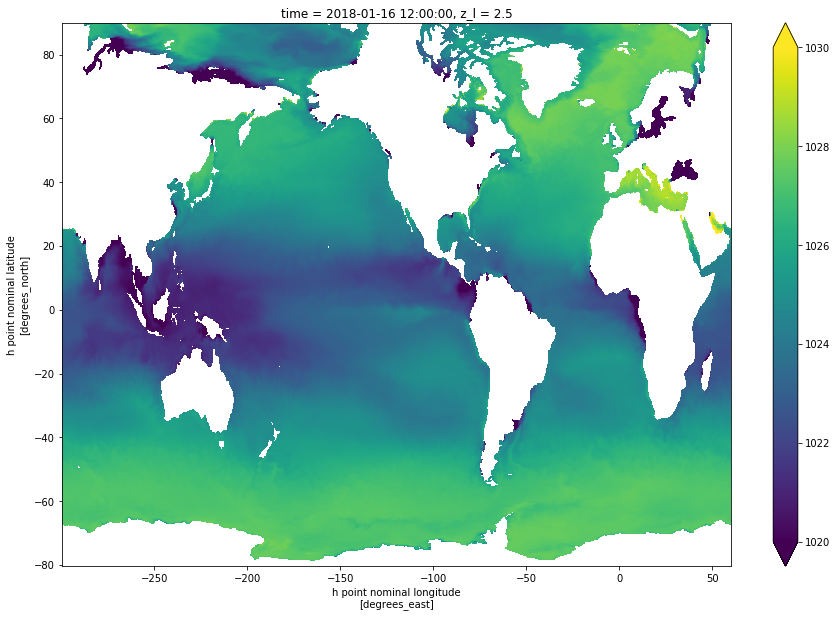

In [56]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
#fig.add_subplot(2, 1,1)
#vort_plt.plot(cmap='bwr', vmin=-1e-5, vmax=1e-5)
#fig.add_subplot(2, 1,2)
den_plt.plot(vmin = 1020, vmax = 1030)

In [14]:
print(ds.thetao)
print(ds.so)
print(dsgrid)

<xarray.DataArray 'thetao' (time: 12, z_l: 35, yh: 1080, xh: 1440)>
dask.array<open_dataset-6dfb6ce05ca23f146e8dc4f6a2b52ae3thetao, shape=(12, 35, 1080, 1440), dtype=float32, chunksize=(12, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature
<xarray.DataArray 'so' (time: 12, z_l: 35, yh: 1080, xh: 1440)>
dask.array<open_dataset-955ba527478b06ea07ba15e406a61435so, shape=(12, 35, 10

In [120]:
# Interpolate Coriolis on different grids
# change to weighted means
#f_xh = grid.interp(dsgrid.Coriolis, 'X', boundary='fill')
#f_yh = grid.interp(dsgrid.Coriolis, 'Y', boundary='fill')

# mean vertical density profile and density anomalies
#dens_z = pot_density.mean('time')
#dens_z = (dens_z*dsgrid.areacello).sum(['xh', 'yh'])/dsgrid.areacello.sum(['xh','yh'])
#anom_density = pot_density - dens_z

#dz = grid.diff(ds.z_i, 'Z', boundary='fill')
#mean_density = (dens_z*dz).sum('z_l')/dz.sum('z_l')
print(mean_density.load())
g = 9.81

# density gradients in x and y
#dens_x = grid.diff(anom_density*dsgrid.dyt, 'X', boundary='fill')/dsgrid.areacello_cu
#dens_y = grid.diff(anom_density*dsgrid.dxt, 'Y', boundary='fill')/dsgrid.areacello_cv

# Geostrophic shear
#dz_ug = dens_y*g/(f_xh*mean_density)
#dz_vg = - dens_x*g/(f_yh*mean_density)

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray ()>
array(423.89051639)


In [48]:
tmp = dz_ug.isel({'z_l': slice(3,4), 'time' : slice(0,1)})
tmp = tmp.sel({'yq'}: slice(-70, -20))
tmp.load()

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


<xarray.DataArray (time: 1, z_l: 1, yq: 1080, xh: 1440)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * time     (time) object 2018-01-16 12:00:00
  * z_l      (z_l) float64 2.5
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03

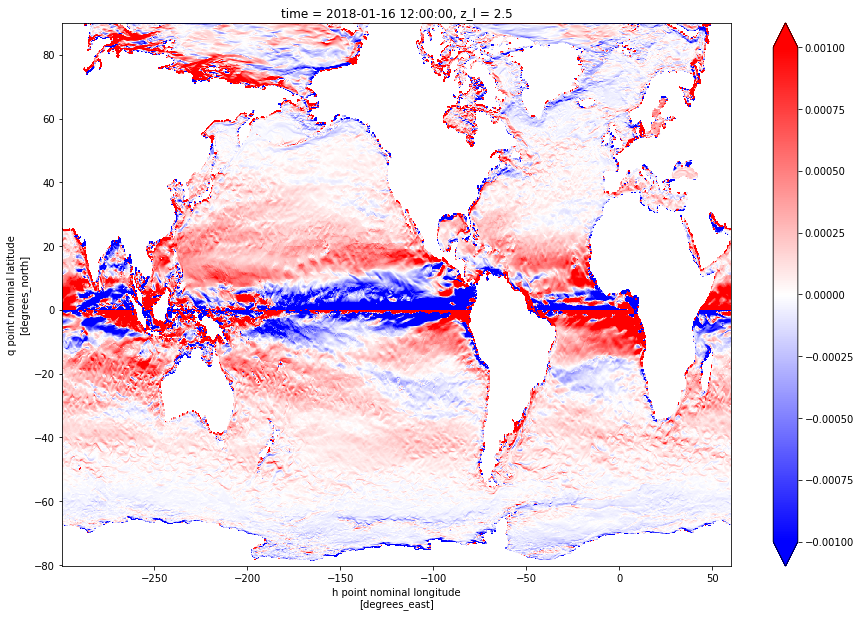

In [57]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
#fig.add_subplot(2, 1,1)
#vort_plt.plot(cmap='bwr', vmin=-1e-5, vmax=1e-5)
#fig.add_subplot(2, 1,2)
tmp.plot(cmap = 'bwr', vmin = -.001, vmax = 0.001)

In [104]:
#grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
#                        'Y': {'center': 'yh', 'right': 'yq'},
#                        'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

#dz = grid.diff(ds.z_i, 'Z', boundary='fill')
ug = grid.cumsum((dz_ug*dz), 'Z', boundary='fill')[::-1]

In [52]:
print(dz_ug)
print(dens_y)

<xarray.DataArray (time: 12, z_l: 35, yq: 1080, xh: 1440)>
dask.array<truediv, shape=(12, 35, 1080, 1440), dtype=float32, chunksize=(12, 35, 1079, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
<xarray.DataArray (time: 12, z_l: 35, yq: 1080, xh: 1440)>
dask.array<truediv, shape=(12, 35, 1080, 1440), dtype=float32, chunksize=(12, 35, 1079, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03


In [42]:
print(f_xh)
print(f_yh)

<xarray.DataArray (yq: 1080, xh: 1440)>
array([[-0.00014353, -0.00014353, -0.00014352, ..., -0.00014353,
        -0.00014353, -0.00014353],
       [-0.0001435 , -0.0001435 , -0.0001435 , ..., -0.0001435 ,
        -0.0001435 , -0.0001435 ],
       [-0.00014347, -0.00014347, -0.00014347, ..., -0.00014347,
        -0.00014347, -0.00014347],
       ...,
       [ 0.00013121,  0.00013133,  0.00013145, ...,  0.00013145,
         0.00013133,  0.00013121],
       [ 0.00013121,  0.00013133,  0.00013145, ...,  0.00013145,
         0.00013133,  0.00013121],
       [ 0.00013121,  0.00013133,  0.00013145, ...,  0.00013145,
         0.00013133,  0.00013121]], dtype=float32)
Coordinates:
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
<xarray.DataArray (yh: 1080, xq: 1440)>
array([[-7.1762748e-05, -7.1762428e-05, -7.1762101e-05, ...,
        -7.1763752e-05, -7.1763410e-05, -7.1763083e-05],
    

In [61]:
print(ds.z_l)

<xarray.DataArray 'z_l' (z_l: 35)>
array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01, 7.5000e+01,
       1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02, 2.5000e+02, 3.1250e+02,
       4.0000e+02, 5.0000e+02, 6.0000e+02, 7.0000e+02, 8.0000e+02, 9.0000e+02,
       1.0000e+03, 1.1000e+03, 1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03,
       1.7500e+03, 2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i


In [66]:
grid = Grid(ds, periodic=['X'])

In [68]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 12, xh: 1440, xq: 1440, yh: 1080, yq: 1080, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 2018-01-16 12:00:00 ... 2018-12-16 12:00:00
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * xq          (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq          (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    obvfsq      (time, z_i

In [81]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

In [105]:
ug
tmp = ug.isel({'z_i': slice(0,1), 'time' : slice(0,1)})
tmp.load()

<xarray.DataArray 'concatenate-d98e691d2df9cde972dc7bc41b470354' (time: 1, z_i: 1, yq: 1080, xh: 1440)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])
Coordinates:
  * time     (time) object 2018-12-16 12:00:00
  * z_i      (z_i) float64 0.0
  * yq       (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.68 89.78 89.89 90.0
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03

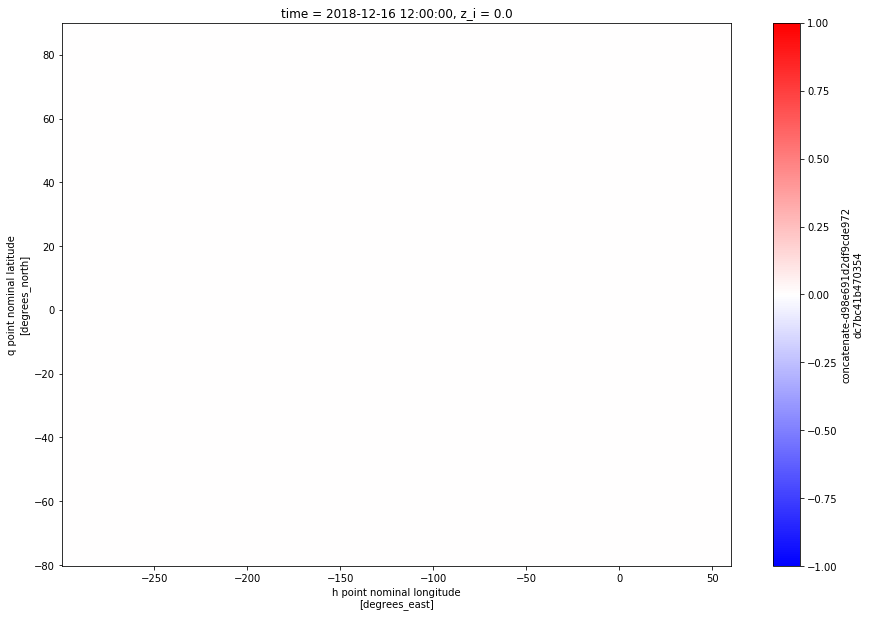

In [106]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
#fig.add_subplot(2, 1,1)
#vort_plt.plot(cmap='bwr', vmin=-1e-5, vmax=1e-5)
#fig.add_subplot(2, 1,2)
tmp.plot(cmap = 'bwr', vmin = -1, vmax = 1.)

In [111]:
dsgrid.wet_h

AttributeError: 'Dataset' object has no attribute 'wet_h'

In [122]:
dens_z.load()

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (z_l: 35)>
array([728.82434 , 728.8402  , 722.645   , 718.24457 , 711.99994 ,
       703.11285 , 695.904   , 690.8467  , 687.00934 , 682.8207  ,
       678.5603  , 675.15063 , 670.5831  , 665.67236 , 661.4178  ,
       657.958   , 655.1724  , 652.5302  , 649.8913  , 647.2288  ,
       644.4338  , 641.5772  , 638.52734 , 635.4848  , 630.05585 ,
       621.35016 , 605.44226 , 575.99976 , 523.3901  , 438.831   ,
       329.04532 , 208.35988 ,  94.84268 ,  20.701202,   2.116254],
      dtype=float32)
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03

In [123]:
dens_z

<xarray.DataArray (z_l: 35)>
array([728.82434 , 728.8402  , 722.645   , 718.24457 , 711.99994 ,
       703.11285 , 695.904   , 690.8467  , 687.00934 , 682.8207  ,
       678.5603  , 675.15063 , 670.5831  , 665.67236 , 661.4178  ,
       657.958   , 655.1724  , 652.5302  , 649.8913  , 647.2288  ,
       644.4338  , 641.5772  , 638.52734 , 635.4848  , 630.05585 ,
       621.35016 , 605.44226 , 575.99976 , 523.3901  , 438.831   ,
       329.04532 , 208.35988 ,  94.84268 ,  20.701202,   2.116254],
      dtype=float32)
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03